In [6]:
# Import required libraries
import openslide
from openslide.deepzoom import DeepZoomGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

main_dir = "/media/dataanalyticlab/Drive2/MANSOOR/Neuroimaging-Project/WSI_Breast_Cancer_ClassificationProj"
SVS_dir = f"{main_dir}/SVS_Data"
labels_dir = f"{main_dir}/WSI_Breast_Cancer_Classification/Labels"
models_dir = f"{main_dir}/WSI_Breast_Cancer_Classification/Model_Weights"
Tiles_dir = f"{main_dir}/Tiles_Data"


In [7]:
def find_missing_files(labels_path, svs_directory, output_path):
    # Load the labels Excel file
    df = pd.read_excel(labels_path)
    df['ID'] = df['ID'].astype(str)

    # Append '.svs' to IDs to form the filenames
    df['filename'] = df['ID'] + '.svs'

    # Check if each file exists in the specified directory
    df['exists'] = df['filename'].apply(lambda x: os.path.isfile(os.path.join(svs_directory, x)))

    # Filter out entries for missing files
    missing_files_df = df[df['exists'] == False]

    # Display the missing files
    if not missing_files_df.empty:
        print("Missing files:")
        print(missing_files_df[['ID', 'filename']])
    else:
        print("No missing files.")
        # Filter the dataframe to only include rows for existing files
    existing_files_df = df[df['exists'] == True].drop(columns=['exists', 'filename'])

    # Save the filtered DataFrame to a new Excel file
    existing_files_df.loc[:,:"NMYC"].to_excel(output_path, index=False)
    print(f"Filtered labels have been saved to {output_path}")
    print("Filtered Data:")
    print(existing_files_df.head())
    

# Set paths and call the function
labels_file_path = f'{labels_dir}/final_labels_wsi.xlsx'  # Update with the path to your labels file
output_labels_path = f'{labels_dir}/filered_final_labels_wsi.xlsx'

find_missing_files(labels_file_path, SVS_dir, output_labels_path)


Missing files:
              ID          filename
2   DI-MH-694-07  DI-MH-694-07.svs
15  DI-MH-226-12  DI-MH-226-12.svs
17  DI-MH-226-14  DI-MH-226-14.svs
19  DI-MH-226-15  DI-MH-226-15.svs
25  DI-MH-243-09  DI-MH-243-09.svs
26  DI-MH-243-18  DI-MH-243-18.svs
27  DI-MH-694-02  DI-MH-694-02.svs
29  DI-MH-694-03  DI-MH-694-03.svs
Filtered labels have been saved to /media/dataanalyticlab/Drive2/MANSOOR/Neuroimaging-Project/WSI_Breast_Cancer_ClassificationProj/WSI_Breast_Cancer_Classification/Labels/filered_final_labels_wsi.xlsx
Filtered Data:
             ID  F/U NMYC Unnamed: 3
0  DI-MH-694-08  NaN    p        NaN
1  DI-MH-694-09  NaN    p        NaN
3  DI-MH-694-06    F    p        NaN
4  DI-MH-694-05    U    p        NaN
5  DI-MH-226-01    F    n        NaN


Slide dimensions: (59759, 53035)
Number of levels: 4
Level dimensions: ((59759, 53035), (14939, 13258), (3734, 3314), (1867, 1657))
Level downsamples: (1.0, 4.0002135475638845, 16.003668195728046, 32.00733639145609)
The number of levels in the tiles object are:  17
The dimensions of data in each level are:  ((1, 1), (2, 2), (4, 4), (8, 7), (15, 13), (30, 26), (59, 52), (117, 104), (234, 208), (467, 415), (934, 829), (1868, 1658), (3735, 3315), (7470, 6630), (14940, 13259), (29880, 26518), (59759, 53035))


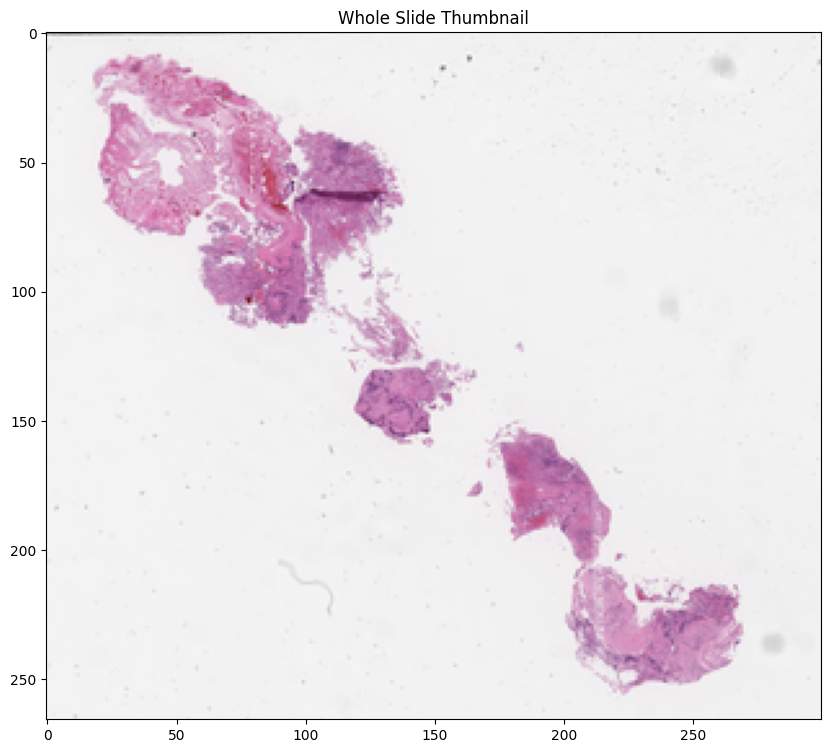

Slide dimensions: (89639, 74238)
Number of levels: 4
Level dimensions: ((89639, 74238), (22409, 18559), (5602, 4639), (2801, 2319))
Level downsamples: (1.0, 4.0001208196047084, 16.00213372275892, 32.00771785903483)
The number of levels in the tiles object are:  18
The dimensions of data in each level are:  ((1, 1), (2, 2), (3, 3), (6, 5), (11, 10), (22, 19), (44, 37), (88, 73), (176, 145), (351, 290), (701, 580), (1401, 1160), (2802, 2320), (5603, 4640), (11205, 9280), (22410, 18560), (44820, 37119), (89639, 74238))


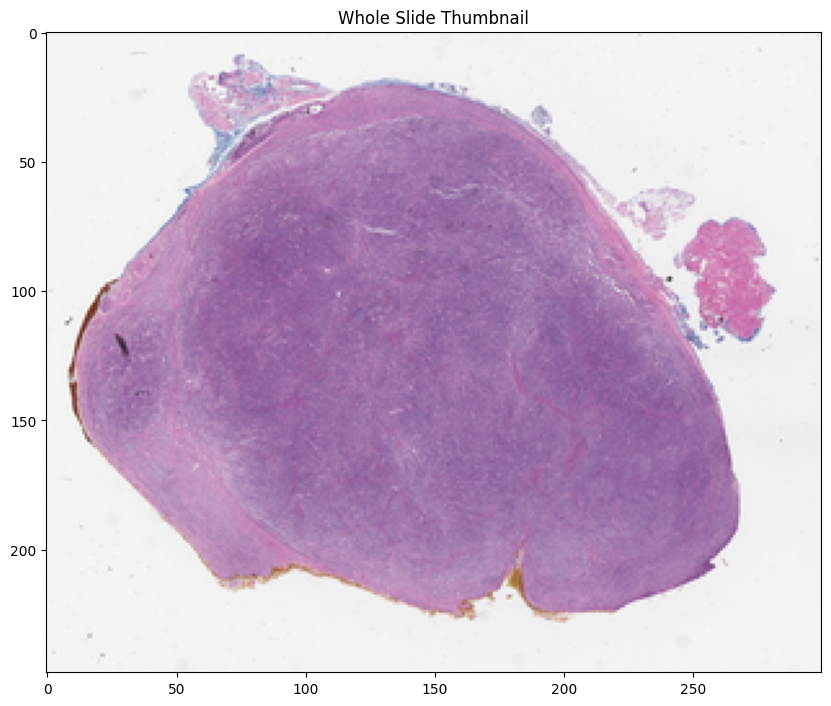

Slide dimensions: (115536, 86868)
Number of levels: 4
Level dimensions: ((115536, 86868), (28884, 21717), (7221, 5429), (3610, 2714))
Level downsamples: (1.0, 4.0, 16.000368391969054, 32.005900664860775)
The number of levels in the tiles object are:  18
The dimensions of data in each level are:  ((1, 1), (2, 2), (4, 3), (8, 6), (15, 11), (29, 22), (57, 43), (113, 85), (226, 170), (452, 340), (903, 679), (1806, 1358), (3611, 2715), (7221, 5430), (14442, 10859), (28884, 21717), (57768, 43434), (115536, 86868))


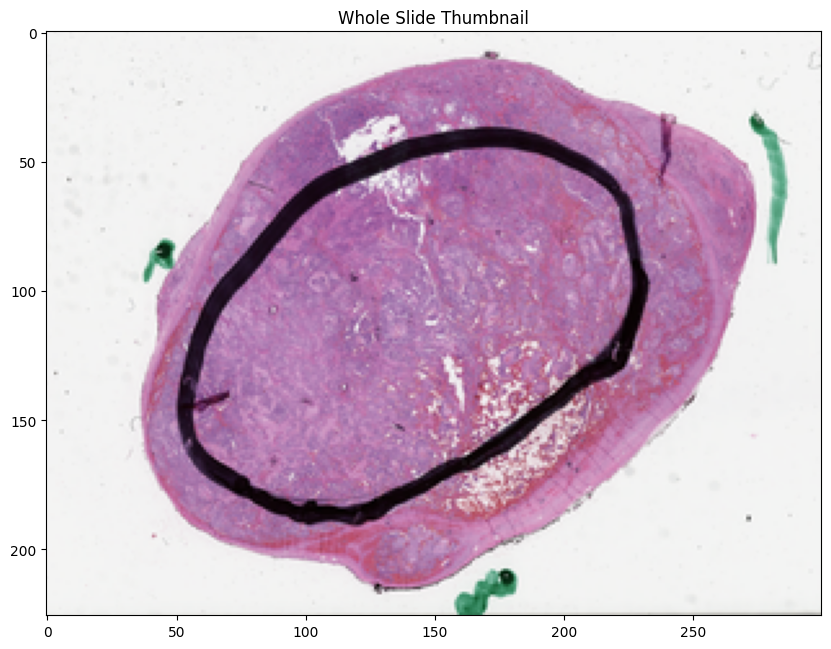

Slide dimensions: (107567, 64022)
Number of levels: 4
Level dimensions: ((107567, 64022), (26891, 16005), (6722, 4001), (3361, 2000))
Level downsamples: (1.0, 4.000118261219338, 16.001865551910146, 32.00773147872657)
The number of levels in the tiles object are:  18
The dimensions of data in each level are:  ((1, 1), (2, 1), (4, 2), (7, 4), (14, 8), (27, 16), (53, 32), (106, 63), (211, 126), (421, 251), (841, 501), (1681, 1001), (3362, 2001), (6723, 4002), (13446, 8003), (26892, 16006), (53784, 32011), (107567, 64022))


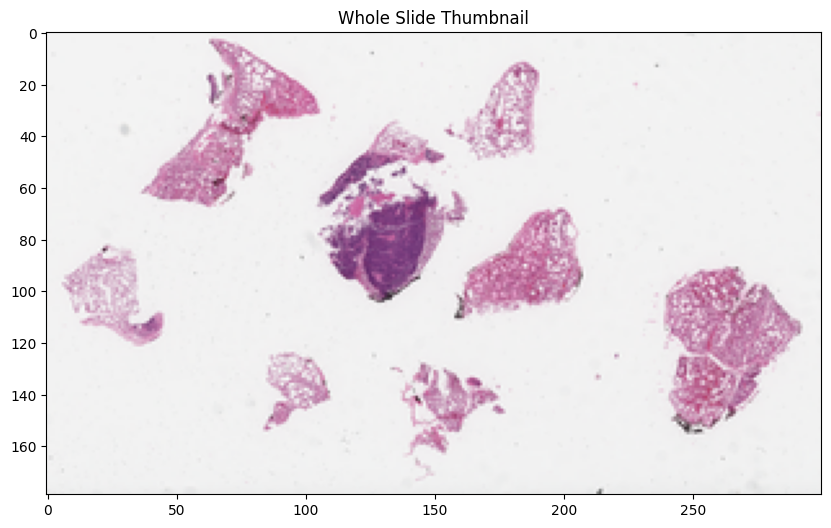

In [28]:
# Function to load an SVS file and show its properties
def load_and_display_info(svs_path):
    slide = openslide.OpenSlide(svs_path)
    print("Slide dimensions:", slide.dimensions)
    print("Number of levels:", slide.level_count)
    print("Level dimensions:", slide.level_dimensions)
    print("Level downsamples:", slide.level_downsamples)
    tiles = DeepZoomGenerator(slide, tile_size=224, overlap=0, limit_bounds=False)
    
    print("The number of levels in the tiles object are: ", tiles.level_count)
    print("The dimensions of data in each level are: ", tiles.level_dimensions)
    
    # Display a thumbnail of the whole slide
    plt.figure(figsize=(10, 10))
    plt.imshow(slide.get_thumbnail(size=(300, 300)))
    plt.title("Whole Slide Thumbnail")
    plt.show()
    
    return slide

# Load example slides
svs_file_paths = [f"{SVS_dir}/1.svs", f"{SVS_dir}/DI-MH-226-01.svs", f"{SVS_dir}/DI-MH-243-01.svs", 
                 f"{SVS_dir}/DI-MH-694-01.svs"]
for file_path in svs_file_paths:
    slide = load_and_display_info(file_path)

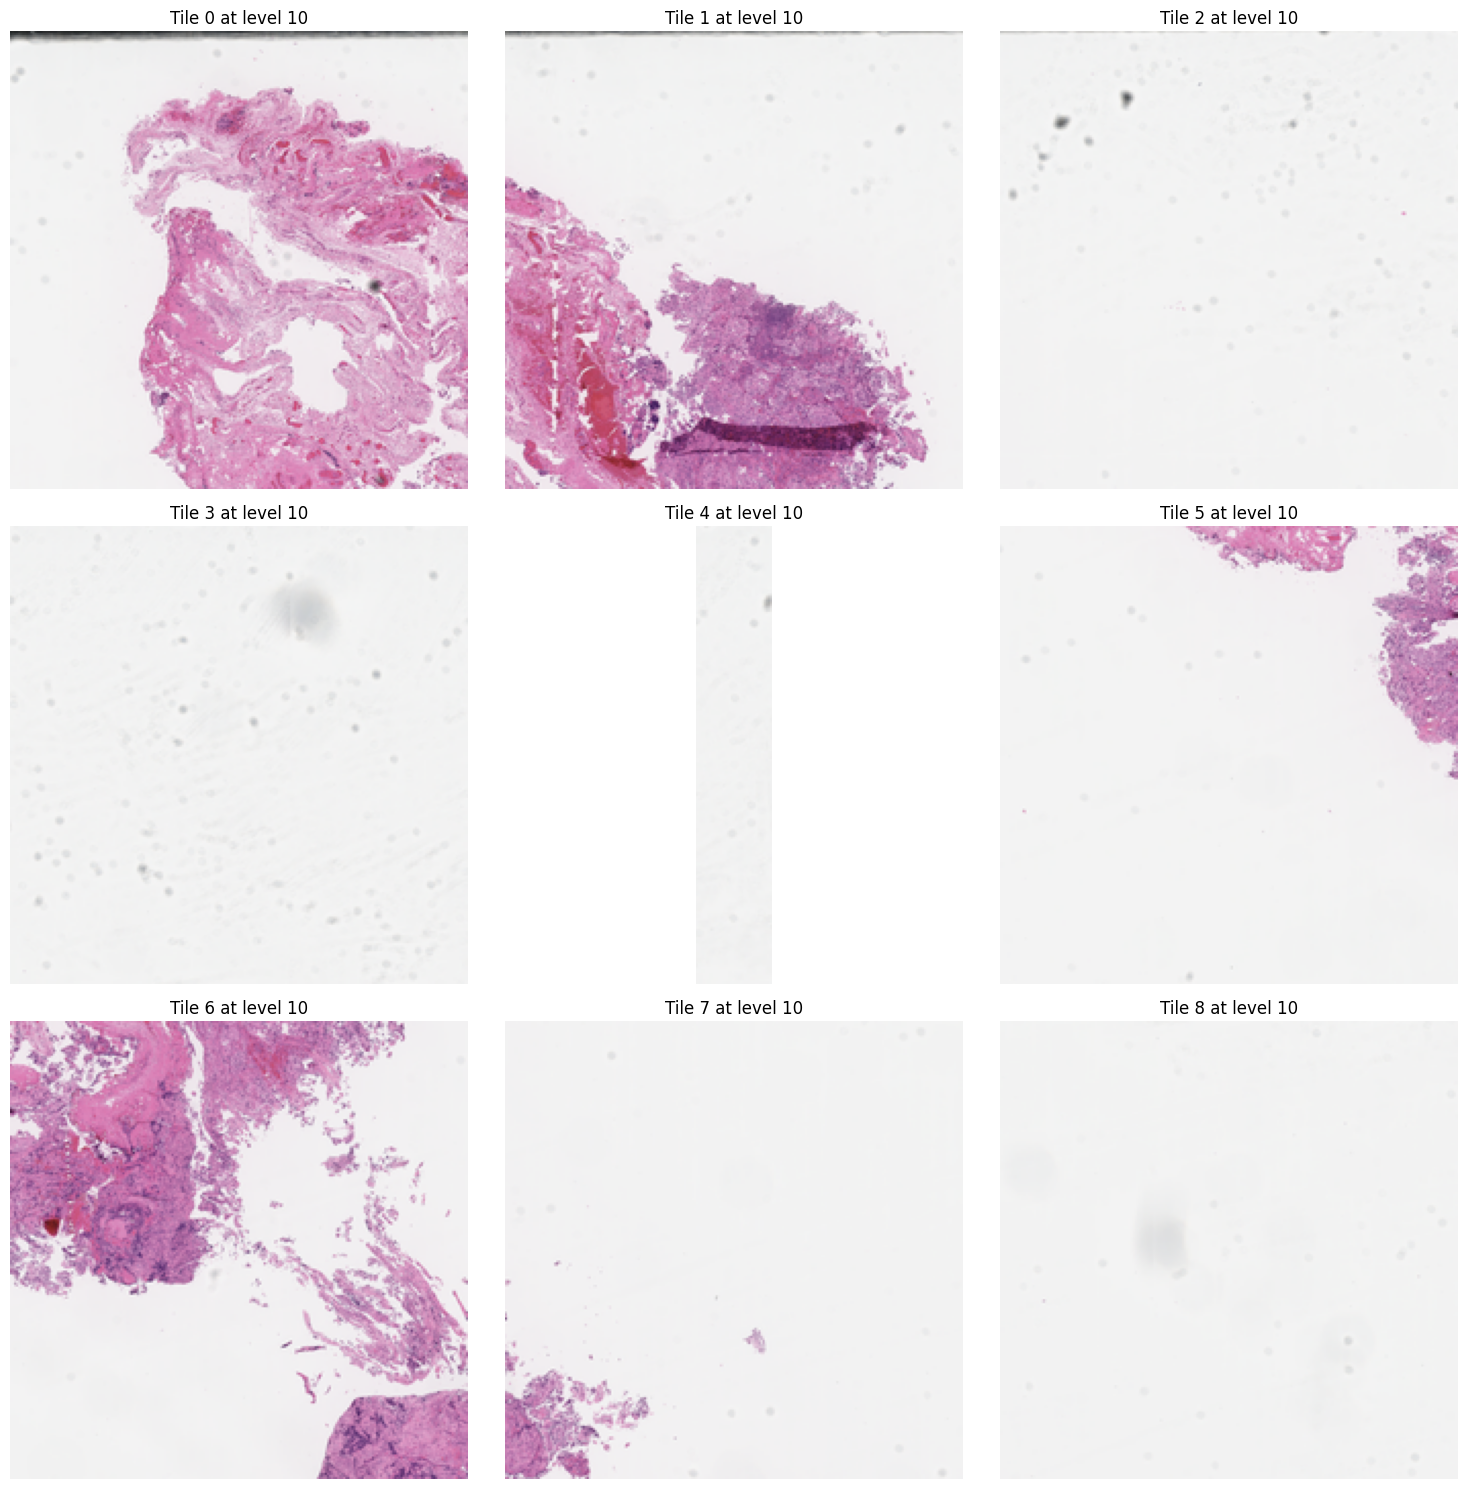

In [49]:

# Function to create a tile generator and extract tiles from a specified level
def create_and_display_tiles(slide, level, tile_size=224):
    dzi = DeepZoomGenerator(slide, tile_size=tile_size, overlap=0, limit_bounds=True)
    cols, rows = dzi.level_tiles[level]
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
    
    for i, ax in enumerate(axs.flatten()):
        if i < cols * rows:
            col, row = i % cols, i // cols
            tile = dzi.get_tile(level, (col, row))
            ax.imshow(tile)
            ax.set_title(f"Tile {i} at level {level}")
            ax.axis('off')
        plt.tight_layout()
        
    return dzi

# Create tiles at a specific level and display them
level_to_extract = 10  # choose a suitable level
tile_generator = create_and_display_tiles(openslide.OpenSlide(svs_file_paths[0]), level_to_extract)



In [50]:
def calculate_total_tiles(svs_path, tile_size=256, overlap=0):
    slide = openslide.OpenSlide(svs_path)
    total_tiles = 0

    print(f"Levels: {slide.level_count}")
    for level in range(slide.level_count):
        dzi = DeepZoomGenerator(slide, tile_size=tile_size, overlap=overlap, limit_bounds=True)
        cols, rows = dzi.level_tiles[level]
        num_tiles = cols * rows
        total_tiles += num_tiles
        print(f"Level {level} ({slide.level_dimensions[level]}): {num_tiles} tiles")

    print(f"Total tiles across all levels: {total_tiles}")

calculate_total_tiles(svs_file_paths[2])

Levels: 4
Level 0 ((115536, 86868)): 1 tiles
Level 1 ((28884, 21717)): 1 tiles
Level 2 ((7221, 5429)): 1 tiles
Level 3 ((3610, 2714)): 1 tiles
Total tiles across all levels: 4


In [51]:
import os
import openslide
from openslide import OpenSlide
import numpy as np
from PIL import Image

def extract_patches(slide, level=2, patch_size=512, overlap=0):
    """
    Extract patches from a specific level within a WSI.

    Parameters:
        slide (OpenSlide): OpenSlide object.
        level (int): The level of the slide to process.
        patch_size (int): Size of the patch (patch_size x patch_size).
        overlap (int): Overlap between patches in pixels.

    Returns:
        List of image patches as PIL images.
    """
    patches = []
    
    level_dimension = slide.level_dimensions[level]
    level_downsample = slide.level_downsamples[level]
    step_size = patch_size - overlap
    
    for y in range(0, level_dimension[1], step_size):
        for x in range(0, level_dimension[0], step_size):
            patch = slide.read_region((int(x * level_downsample), int(y * level_downsample)), 0, (patch_size, patch_size))
            patches.append(patch.convert('RGB'))  # Convert to RGB
    return patches

def save_patches(patches, save_dir, slide_name):
    """
    Save each patch to the filesystem.

    Parameters:
        patches (list): List of PIL Images.
        save_dir (str): Directory to save patches.
        slide_name (str): Base name of the slide to use in naming patches.
    """
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    for i, patch in enumerate(patches):
        patch.save(os.path.join(save_dir, f"{slide_name}_patch_{i}.png"))

def process_slides(slide_dir, output_dir, level=2, patch_size=512, overlap=0):
    """
    Process all slides in a directory.

    Parameters:
        slide_dir (str): Directory containing .svs files.
        output_dir (str): Directory to save output patches.
        level (int): Level of WSI to process.
        patch_size (int): Size of each patch.
        overlap (int): Overlap between patches.
    """
    for slide_path in os.listdir(slide_dir):
        if slide_path.endswith('.svs'):
            slide_name = os.path.splitext(slide_path)[0]
            slide = OpenSlide(os.path.join(slide_dir, slide_path))
            print(f"Processing {slide_path} at level {level}...")
            for level in range(slide.level_count):
                patches = extract_patches(slide, level, patch_size, overlap)
                save_patches(patches, os.path.join(output_dir, slide_name), slide_name)
                print(f"Saved patches for {slide_path}.")


# Process all slides
process_slides(SVS_dir, Tiles_dir, patch_size=512, overlap=50)


Processing 1.svs at level 2...


In [44]:
import os
import pandas as pd
import numpy as np
from openslide import OpenSlide, OpenSlideUnsupportedFormatError
from openslide.deepzoom import DeepZoomGenerator
from PIL import Image

def load_labels(file_path):
    return pd.read_excel(file_path)

def extract_tiles(svs_path, label, output_dir, tile_size=256, overlap=0, white_threshold=235):
    try:
        slide = OpenSlide(svs_path)
        base_filename = os.path.splitext(os.path.basename(svs_path))[0]
        print(f"Processing {svs_path} with {slide.level_count} levels.")

        for level in range(slide.level_count):
            dzi = DeepZoomGenerator(slide, tile_size=tile_size, overlap=overlap, limit_bounds=True)
            cols, rows = dzi.level_tiles[level]
            print(f"Level {level}: {cols}x{rows} tiles")

            # Create directories for each level under their respective labels
            level_dir = os.path.join(output_dir, label, base_filename, f"Level_{level}")
            os.makedirs(level_dir, exist_ok=True)

            tile_count = 0
            for col in range(cols):
                for row in range(rows):
                    tile = dzi.get_tile(level, (col, row))
                    tile_np = np.array(tile)
                    if np.mean(tile_np) < white_threshold and np.std(tile_np) > 20:  # Filter out blank tiles
                        tile_filename = f"tile_{col}_{row}.png"
                        tile.save(os.path.join(level_dir, tile_filename))
                        tile_count += 1

            print(f"Saved {tile_count} tiles from {svs_path} at level {level}")

    except OpenSlideUnsupportedFormatError:
        print(f"Unsupported format for file {svs_path}")
    except Exception as e:
        print(f"Error processing {svs_path}: {e}")

def main(labels_file, svs_directory, output_directory):
    labels_df = load_labels(labels_file)
    
    for _, row in labels_df.iterrows():
        svs_filename = f"{row['ID'].split(' ')[0]}.svs"
        svs_path = os.path.join(svs_directory, svs_filename)
        if os.path.exists(svs_path):
            extract_tiles(svs_path, row['NMYC'], output_directory)
        else:
            print(f"File not found: {svs_path}")


main(output_labels_path, SVS_dir, Tiles_dir)  # Specify desired level


Processing /media/dataanalyticlab/Drive2/MANSOOR/Neuroimaging-Project/WSI_Breast_Cancer_ClassificationProj/SVS_Data/DI-MH-694-08.svs with 4 levels.
Level 0: 1x1 tiles
Saved 0 tiles from /media/dataanalyticlab/Drive2/MANSOOR/Neuroimaging-Project/WSI_Breast_Cancer_ClassificationProj/SVS_Data/DI-MH-694-08.svs at level 0
Level 1: 1x1 tiles
Saved 0 tiles from /media/dataanalyticlab/Drive2/MANSOOR/Neuroimaging-Project/WSI_Breast_Cancer_ClassificationProj/SVS_Data/DI-MH-694-08.svs at level 1
Level 2: 1x1 tiles
Saved 0 tiles from /media/dataanalyticlab/Drive2/MANSOOR/Neuroimaging-Project/WSI_Breast_Cancer_ClassificationProj/SVS_Data/DI-MH-694-08.svs at level 2
Level 3: 1x1 tiles
Saved 0 tiles from /media/dataanalyticlab/Drive2/MANSOOR/Neuroimaging-Project/WSI_Breast_Cancer_ClassificationProj/SVS_Data/DI-MH-694-08.svs at level 3
Processing /media/dataanalyticlab/Drive2/MANSOOR/Neuroimaging-Project/WSI_Breast_Cancer_ClassificationProj/SVS_Data/DI-MH-694-09.svs with 4 levels.
Level 0: 1x1 tiles
S